# Esercizio 12.1

##### Prova con Stochastic Gradient Descent
Ho notato che dopo 50 epoche circa (con il dropout a 0.7) l'errore sui dati di test iniziava ad aumentare, ciò voleva dire che la rete era stata overfittata, così ho utilizzato 50 epoche.

In [58]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from IPython.display import Audio, display
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [59]:
def beep():
    duration = 1  # durata in secondi del suono
    sample_rate = 10000  # Puoi regolare questa frequenza per cambiare il tono del suono.
    t = np.linspace(0, duration, int(sample_rate * duration))
    wave = np.sin(2 * np.pi * 440 * t)  # Tono di 440 Hz (nota LA)
    display(Audio(wave, rate=sample_rate, autoplay=True))
    
beep()

#### Step 1: Load and Process the Data

In [60]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


#### Reshape data and convert labels to be used with categorical cross entropy

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


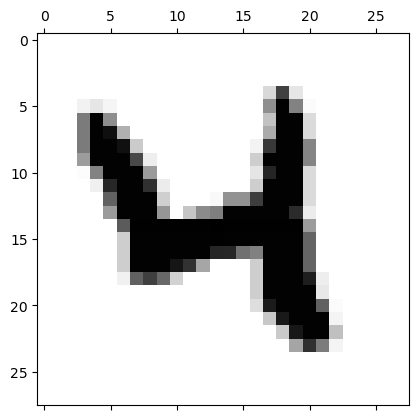

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [61]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#### Step 2: Define the Neural Net and its Architecture
Applico il dropout agli strati più interni della DNN

In [5]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # apply dropout with rate 0.7
    model.add(Dropout(0.7))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.7))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

In [6]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')
# create the deep neural net
model_DNN_1 = compile_model()

Model compiled successfully and ready to be trained.


#### Step 4: Train the model

In [7]:
%%time
# training parameters
batch_size = 10
epochs = 50

# train DNN and store training info in history
history = model_DNN_1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

beep() # to advice the end of the cell

Epoch 1/50
6000/6000 [==============================] - 12s 2ms/step - loss: 0.9079 - acc: 0.7035 - val_loss: 0.2908 - val_acc: 0.9185
Epoch 2/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.4918 - acc: 0.8580 - val_loss: 0.2146 - val_acc: 0.9371
Epoch 3/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3968 - acc: 0.8883 - val_loss: 0.1837 - val_acc: 0.9456
Epoch 4/50
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3441 - acc: 0.9055 - val_loss: 0.1607 - val_acc: 0.9536
Epoch 5/50
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3183 - acc: 0.9127 - val_loss: 0.1515 - val_acc: 0.9549
Epoch 6/50
6000/6000 [==============================] - 14s 2ms/step - loss: 0.2885 - acc: 0.9213 - val_loss: 0.1386 - val_acc: 0.9592
Epoch 7/50
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2721 - acc: 0.9265 - val_loss: 0.1248 - val_acc: 0.9630
Epoch 8/50
6000/6000 [==============================] -

CPU times: total: 1h 41min 19s
Wall time: 11min 49s


#### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - acc: 0.9780

Test loss: 0.0808836817741394
Test accuracy: 0.9779999852180481


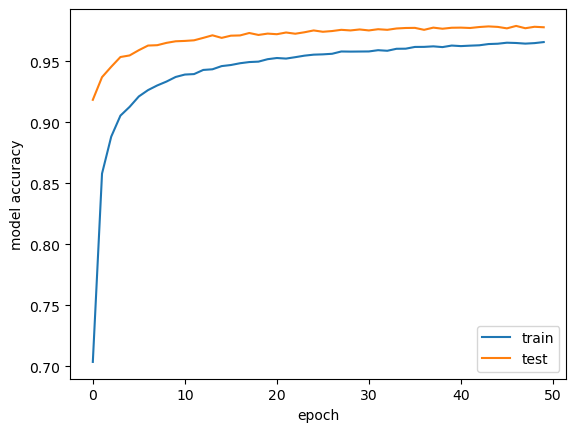

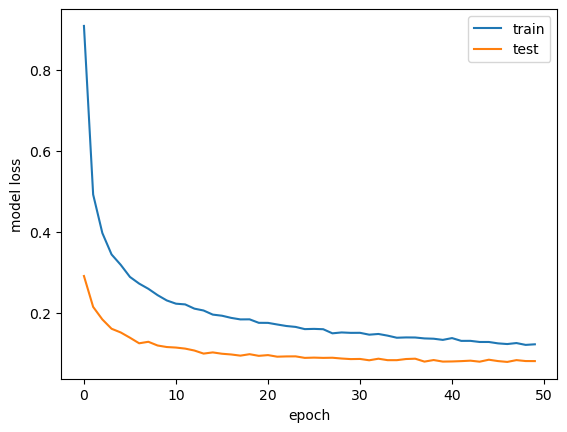

In [8]:
# evaluate model
score = model_DNN_1.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


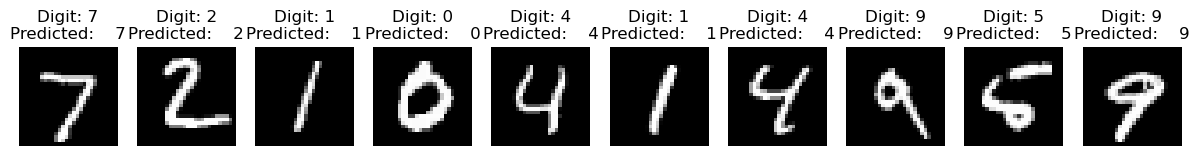

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_1.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Prova con Adadelta

Utilizzando il dropout il training richiedeva troppo tempo così non l'ho inserito. Tuttavia anche senza dropout con 500 epoche e batch_size=100 non ha raggiunto dei buoni risultati.

In [14]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # apply dropout with rate 0.1
    #model.add(Dropout(0.7))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.7))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# create the deep neural net
model_DNN_2 = compile_model()

Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [15]:
%%time
# training parameters
batch_size = 100
epochs = 500

# train DNN and store training info in history
history = model_DNN_2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

beep() # to advice the end of the cell

Epoch 1/500
600/600 [==============================] - 2s 3ms/step - loss: 2.2684 - acc: 0.1578 - val_loss: 2.1942 - val_acc: 0.2149
Epoch 2/500
600/600 [==============================] - 2s 3ms/step - loss: 2.1268 - acc: 0.3182 - val_loss: 2.0548 - val_acc: 0.4288
Epoch 3/500
600/600 [==============================] - 2s 4ms/step - loss: 1.9924 - acc: 0.5063 - val_loss: 1.9189 - val_acc: 0.5710
Epoch 4/500
600/600 [==============================] - 2s 3ms/step - loss: 1.8603 - acc: 0.6018 - val_loss: 1.7848 - val_acc: 0.6416
Epoch 5/500
600/600 [==============================] - 2s 3ms/step - loss: 1.7297 - acc: 0.6569 - val_loss: 1.6525 - val_acc: 0.6848
Epoch 6/500
600/600 [==============================] - 2s 3ms/step - loss: 1.6023 - acc: 0.6920 - val_loss: 1.5249 - val_acc: 0.7177
Epoch 7/500
600/600 [==============================] - 2s 3ms/step - loss: 1.4801 - acc: 0.7192 - val_loss: 1.4034 - val_acc: 0.7419
Epoch 8/500
600/600 [==============================] - 2s 3ms/step - 

600/600 [==============================] - 2s 3ms/step - loss: 0.2693 - acc: 0.9257 - val_loss: 0.2605 - val_acc: 0.9284
Epoch 124/500
600/600 [==============================] - 2s 3ms/step - loss: 0.2685 - acc: 0.9259 - val_loss: 0.2597 - val_acc: 0.9284
Epoch 125/500
600/600 [==============================] - 2s 3ms/step - loss: 0.2677 - acc: 0.9259 - val_loss: 0.2590 - val_acc: 0.9285
Epoch 126/500
600/600 [==============================] - 2s 3ms/step - loss: 0.2669 - acc: 0.9263 - val_loss: 0.2583 - val_acc: 0.9288
Epoch 127/500
600/600 [==============================] - 2s 3ms/step - loss: 0.2661 - acc: 0.9265 - val_loss: 0.2575 - val_acc: 0.9290
Epoch 128/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2653 - acc: 0.9265 - val_loss: 0.2569 - val_acc: 0.9292
Epoch 129/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2646 - acc: 0.9267 - val_loss: 0.2562 - val_acc: 0.9293
Epoch 130/500
600/600 [==============================] - 2s 4ms/step 

Epoch 184/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2303 - acc: 0.9368 - val_loss: 0.2261 - val_acc: 0.9361
Epoch 185/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2297 - acc: 0.9369 - val_loss: 0.2256 - val_acc: 0.9369
Epoch 186/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2292 - acc: 0.9371 - val_loss: 0.2252 - val_acc: 0.9376
Epoch 187/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2287 - acc: 0.9374 - val_loss: 0.2247 - val_acc: 0.9365
Epoch 188/500
600/600 [==============================] - 2s 3ms/step - loss: 0.2282 - acc: 0.9374 - val_loss: 0.2242 - val_acc: 0.9369
Epoch 189/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2277 - acc: 0.9375 - val_loss: 0.2238 - val_acc: 0.9371
Epoch 190/500
600/600 [==============================] - 2s 4ms/step - loss: 0.2272 - acc: 0.9377 - val_loss: 0.2234 - val_acc: 0.9370
Epoch 191/500
600/600 [==============================] 

Epoch 305/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1823 - acc: 0.9492 - val_loss: 0.1840 - val_acc: 0.9486
Epoch 306/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1820 - acc: 0.9492 - val_loss: 0.1838 - val_acc: 0.9486
Epoch 307/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1817 - acc: 0.9493 - val_loss: 0.1834 - val_acc: 0.9486
Epoch 308/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1814 - acc: 0.9494 - val_loss: 0.1832 - val_acc: 0.9487
Epoch 309/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1811 - acc: 0.9495 - val_loss: 0.1829 - val_acc: 0.9489
Epoch 310/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1808 - acc: 0.9496 - val_loss: 0.1826 - val_acc: 0.9489
Epoch 311/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1805 - acc: 0.9495 - val_loss: 0.1824 - val_acc: 0.9488
Epoch 312/500
600/600 [==============================] 

Epoch 426/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1514 - acc: 0.9579 - val_loss: 0.1568 - val_acc: 0.9550
Epoch 427/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1512 - acc: 0.9581 - val_loss: 0.1565 - val_acc: 0.9549
Epoch 428/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1509 - acc: 0.9582 - val_loss: 0.1564 - val_acc: 0.9552
Epoch 429/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1507 - acc: 0.9582 - val_loss: 0.1562 - val_acc: 0.9551
Epoch 430/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1505 - acc: 0.9582 - val_loss: 0.1560 - val_acc: 0.9549
Epoch 431/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1503 - acc: 0.9584 - val_loss: 0.1558 - val_acc: 0.9552
Epoch 432/500
600/600 [==============================] - 2s 4ms/step - loss: 0.1501 - acc: 0.9584 - val_loss: 0.1556 - val_acc: 0.9553
Epoch 433/500
600/600 [==============================] 

CPU times: total: 2h 45min 8s
Wall time: 18min 6s


In [16]:
#save_model_path='Saved/DNN_Afadelta.h5'
#model_DNN_2.save(filepath=save_model_path, include_optimizer=True)

313/313 [==============================] - 1s 1ms/step - loss: 0.1444 - acc: 0.9581

Test loss: 0.14435938000679016
Test accuracy: 0.9581000208854675


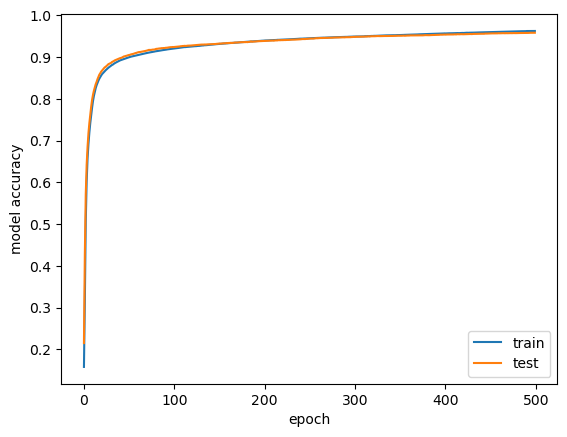

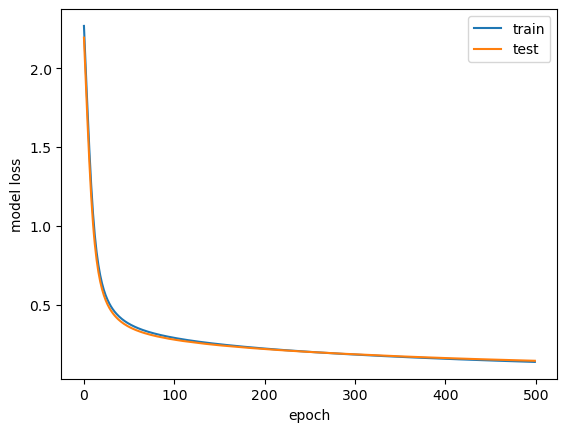

In [17]:
# evaluate model
score = model_DNN_2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


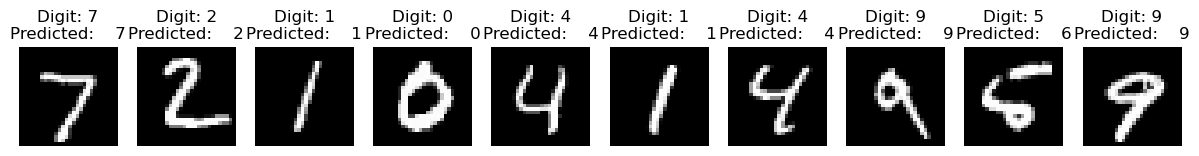

In [18]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_2.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Prova con Adam
Questo ottimizzatore richiede molte meno epoche dei precedenti algoritmi, con una dimensione dei batch di 10 e il dropout settato a 0.7, se si eccedono le 10 epoche la rete overfitta i dati di training.

In [62]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.7))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.7))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

# create the deep neural net
model_DNN_4 = compile_model()

Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [63]:
%%time
# training parameters
batch_size = 10
epochs = 10

# train DNN and store training info in history
history = model_DNN_4.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

beep() # to advice the end of the cell

Epoch 1/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.6513 - acc: 0.8047 - val_loss: 0.2041 - val_acc: 0.9427
Epoch 2/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4130 - acc: 0.8894 - val_loss: 0.1897 - val_acc: 0.9488
Epoch 3/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3609 - acc: 0.9050 - val_loss: 0.1569 - val_acc: 0.9580
Epoch 4/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.3410 - acc: 0.9110 - val_loss: 0.1437 - val_acc: 0.9615
Epoch 5/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3208 - acc: 0.9168 - val_loss: 0.1440 - val_acc: 0.9625
Epoch 6/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.3098 - acc: 0.9203 - val_loss: 0.1408 - val_acc: 0.9637
Epoch 7/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.3020 - acc: 0.9210 - val_loss: 0.1336 - val_acc: 0.9659
Epoch 8/10
6000/6000 [==============================] -

CPU times: total: 21min 57s
Wall time: 2min 32s


313/313 [==============================] - 1s 1ms/step - loss: 0.1336 - acc: 0.9670

Test loss: 0.13355652987957
Test accuracy: 0.9670000076293945


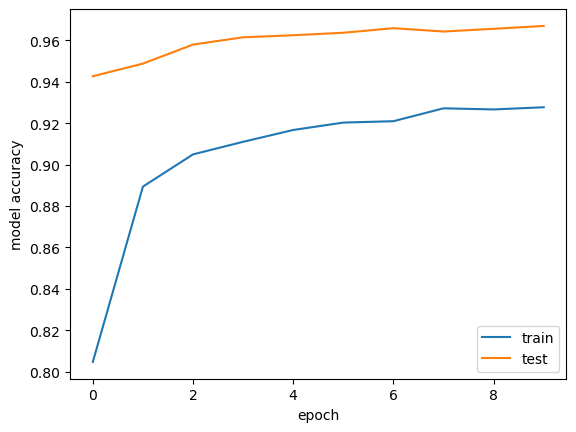

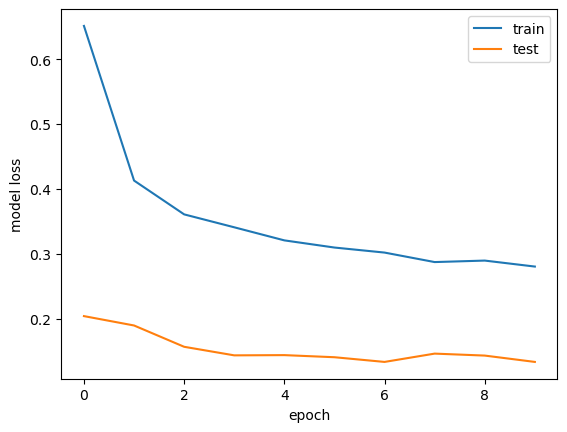

In [64]:
# evaluate model
score = model_DNN_4.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


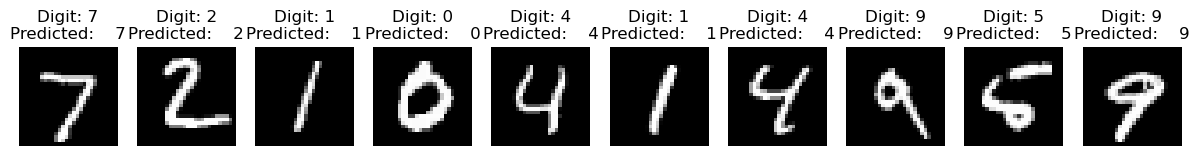

In [65]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN_4.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Sembra che l'ottimizzatore Adam sia il migliore tra i 3 testati, raggiunge gli stessi risulati del SGD ma in molto meno tempo. Sulla pagina di keras dedicata a questo ottimizzatore viene detto "According to Kingma et al., 2014, the method is << computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters >>.", e infatti in questo caso si hanno tanti pixel in input e tanti parametri.